This notebook investigates data properties of the provided comment dataset focusing on comment type.

Non-information distribution in the dataset:

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['type', 'non-information'])

values = data['non-information'].tolist()
types = data['type'].tolist()

comment_types = pd.Series(values, types)
counts = comment_types.value_counts()
counts

no                                                                                           925
yes                                                                                          370
 StyleSheet sheet = ((HTMLEditorKit) getEditorKit()).getStyleSheet()                           1
 menu.getItems().add(previousPreviewLayout)                                                    1
 previewToggle.setSelected(Globals.prefs.getPreviewPreferences().isPreviewPanelEnabled())      1
 a group won't take up any space if it has no children                                         1
dtype: int64

Non-information distribution- percentage:

In [3]:
no_counts = counts['no']
yes_counts = counts['yes']

yes_percent = 100 * yes_counts / (yes_counts + no_counts)
no_percent = 100 * no_counts / (yes_counts + no_counts)

print("Non-information yes percentage: " + str(round(yes_percent)) + "%")
print("Non-information no percentage: " + str(round(no_percent)) + "%")

Non-information yes percentage: 29.0%
Non-information no percentage: 71.0%


Comment type counts

In [4]:
comment_types = pd.Series(types, values)
comment_types.value_counts()

Line       786
Javadoc    482
Block       43
dtype: int64

Data:

In [5]:
data.head()

,type,non-information
0,Javadoc,yes
1,Line,yes
2,Line,no
3,Javadoc,yes
4,Block,no


Total data count:

In [6]:
data.shape[0]

1311

Comment type vs non-information

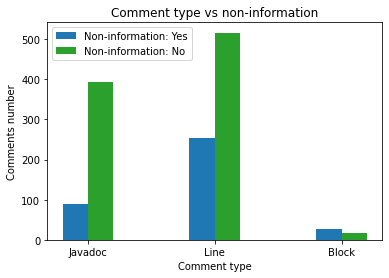

In [7]:
comment_types = pd.Series(values, types)
javadoc_vals = comment_types['Javadoc'].values
javadoc_yes = len(list(filter(lambda x: x == 'yes', javadoc_vals)))
javadoc_no = len(list(filter(lambda x: x == 'no', javadoc_vals)))

line_vals = comment_types['Line'].values
line_yes = len(list(filter(lambda x: x == 'yes', line_vals)))
line_no = len(list(filter(lambda x: x == 'no', line_vals)))

block_vals = comment_types['Block'].values
block_yes = len(list(filter(lambda x: x == 'yes', block_vals)))
block_no = len(list(filter(lambda x: x == 'no', block_vals)))

import numpy as np
import matplotlib.pyplot as plt


N = 5
y1 = np.array([javadoc_yes, line_yes, block_yes])
y2 = np.array([javadoc_no, line_no, block_no])

x = np.arange(len(y1))
width = 0.20

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Comment type vs non-information')
plt.xlabel('Comment type')
plt.ylabel('Comments number')
axes.bar(x, y1, width=-1.*width, align='edge', label="Non-information: Yes")
axes.bar(x, y2, width=width, align='edge', color=list(plt.rcParams['axes.prop_cycle'])[2]['color'], label="Non-information: No")
axes.set_xticks(x)
axes.set_xticklabels(['Javadoc', 'Line', 'Block'])
plt.legend()
plt.show()

Comment type vs non-information: yes --> percentage

In [ ]:
javadoc_yes_percent = javadoc_yes * 100 / (javadoc_no + javadoc_yes)
line_yes_percent = line_yes * 100 / (line_yes + line_no)
block_yes_percent = block_no * 100 / (block_yes + block_no)

fig, axes = plt.subplots(ncols=1, nrows=1)
plt.title('Comment type vs percentage of non-information: yes')
plt.xlabel('Comment type')
plt.ylabel('Non-information: yes- percentage [%]')

objects = ('Javadoc', 'Line', 'Block')
y_pos = np.arange(len(objects))
percentage = [javadoc_yes_percent, line_yes_percent, block_yes_percent]

plt.bar(y_pos, percentage, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.show()
